## PTI Eviction Lab Session

#### June 30, 2025

 This document is intended to accompany the PTI lunchtime session presented by the Eviction Lab for reference after the session is complete.

### Loading data

Let's load some publicly available data from the Eviction Lab's website.

Go to <https://evictionlab.org/eviction-tracking/> and scroll to *Eviction Filings For All Sites*. Next to the linechart on the right, there is a button with an arrow to download called *Get the Data for this figure*. Click download. 

If it saves to your downloads folder, you can read it in with the following code. If this filepath does not work, you might need to find out where it is located. You can google "how to find my file's filepath".

## Recreate a linechart for a city or state

### Step 1: Download the data
Choose a site from <https://evictionlab.org/eviction-tracking/> and click on the name of the site to bring you to the site page.

Once on a site-specific page, scroll down to *Trends in eviction filings* to find the linechart entitled "Trends in eviction filings". To the left, click the download arrow labeled "Get the data for this figure". Ensure this file downloads to your "Downloads" folder.

For this example, we will recreate the linechart for Memphis, TN. You can choose any of the cities or states on our website.

### Step 2: import the modules we need
We will use the following modules:
- `pandas`
- `matplotlib.pyplot`
- `matplotlib.dates`

If you don't have any of the following installed, you will have to install them in the terminal.

For example:

In [1]:
# Only run to install the package if you don't have it
# Run this in terminal
pip install pandas


SyntaxError: invalid syntax (4075022936.py, line 3)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


### Step 3: Read the csv file into python and assign it to a variable name
You can name this data object anything you'd like. I'm going to call it `site_data`. To run the code below, change `memphis_barchart.csv` to whatever city or state's data you downloaded. 

In [3]:
# below, pd references the package pandas, which we imported with the nickname pd. This says to use the 
# read_csv function from the pandas package.
site_data = pd.read_csv('~/Downloads/memphis_barchart.csv')

In [ ]:
# take a look at what our data looks like
site_data

### Step 4: create a basic linechart

To create a visualization, we will use a function called `plot()` from the `matplotlib.pyplot` module. 

We need to give this function the columns we want it to plot. We should pass it `plot(x_axis_col, y_axis_col)`. In our case, we want the x-axis to be the date (the variable in our case is called "month") and the y-axis to be the number of eviction filings (the variable is called "month_filings").

We need to reference the columns in respect to the data we are using. Python won't know what `month` is from, but it does know what `site_data['month']` is.

Here is the basic format required for this linechart. 

Try it yourself! Hint: you will need to modify the `month` variable to be read into python as a date. You can do this using the `to_datetime()` function before adding the data to the plot. We also need to sort the months in order, otherwise the linechart will connect the lines in the wrong order. If you are stuck, look at the solution below:


/var/folders/9q/5qp9xbsx5zvf59qd0sq99mr80000gr/T/ipykernel_61506/2188056361.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  site_data['month'] = pd.to_datetime(site_data['month'])


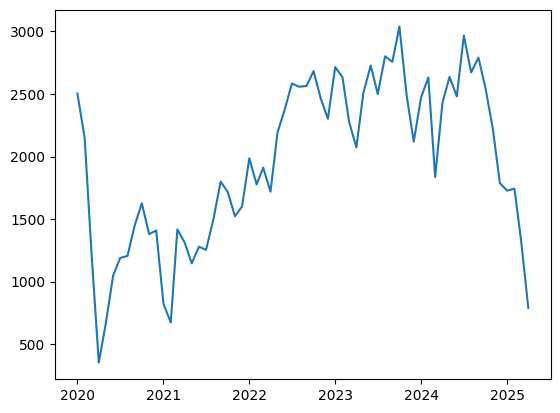

In [4]:
# convert `month` to be a date format
site_data['month'] = pd.to_datetime(site_data['month'])

# order the dataset by month (earliest first)
site_data = site_data.sort_values(by='month')

# create a basic linechart
plt.plot(site_data['month'], site_data['month_filings'])


### Step 5 (bonus): add details to the linechart as time allows

Congratulations! You have successfully created the basic structure of the linechart! Now, you can add the frills that make it more appealing to a viewer. This will guide you how to exactly copy the chart on the website, but you can play around with the linechart to change it to your liking.

Here are some elements that you can add, with examples to follow. At the end, there will be the full code for each element added together.

Elements you might want to add:

-   a plot title
-   rotate x-axis labels and change labels
-   different font for all text
-   an additional line that measures the monthly average filings over time
-   line colors
-   line width
-   a subset of time

Text(0.5, 1.0, 'Trends in Eviction Filings for Memphis')

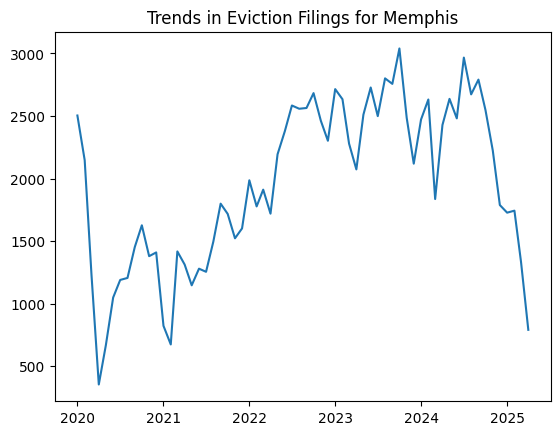

In [5]:
# Adding a plot title
plt.plot(site_data['month'], site_data['month_filings'])

# this adds the title
# change the title so it identifies your site, or to whatever you want it to be!
plt.title('Trends in Eviction Filings for Memphis')

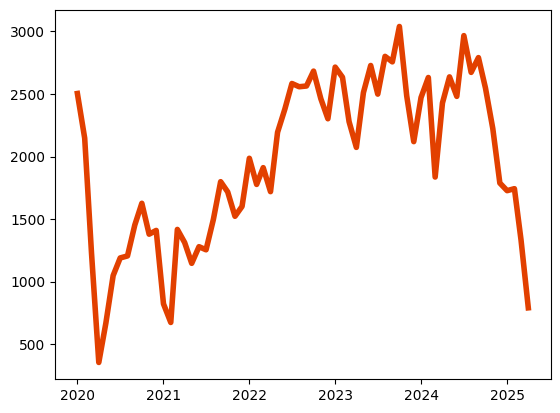

In [6]:
# Change the line color and width
# You can change the hex code to be any color you want
plt.plot(site_data['month'], site_data['month_filings'], 
         # this sets the color
         color = '#e24000',
         # this sets the linewidth
         linewidth = 4
         )

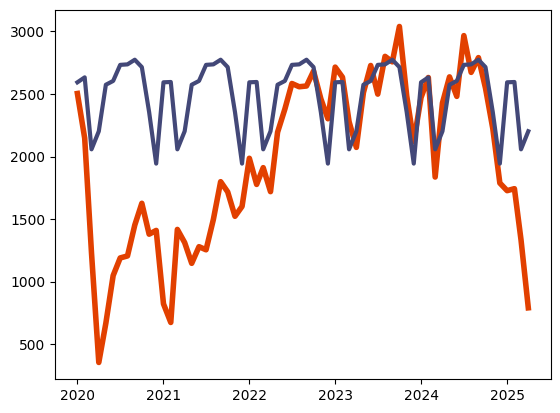

In [7]:
# Add another additional line that measures the monthly average filings over time
plt.plot(site_data['month'], site_data['month_filings'], color = '#e24000', linewidth = 4)

# simply add another line with the data you want the next line to represent
# change the color and width to whatever you like!
plt.plot(site_data['month'], site_data['avg_filings'], color = '#434878', linewidth = 3)

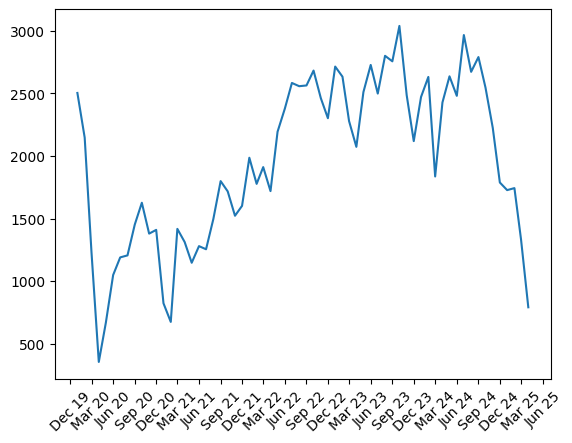

In [8]:
# Rotate x-axis labels and change labels
plt.plot(site_data['month'], site_data['month_filings'])

# this rotates the x-axis labels
plt.xticks(rotation=45)

# this changes the labels so instead of being every year, it will list every 3 months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# this changes it so instead of the format `2024-01``, it'll say `Jan 24`
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))


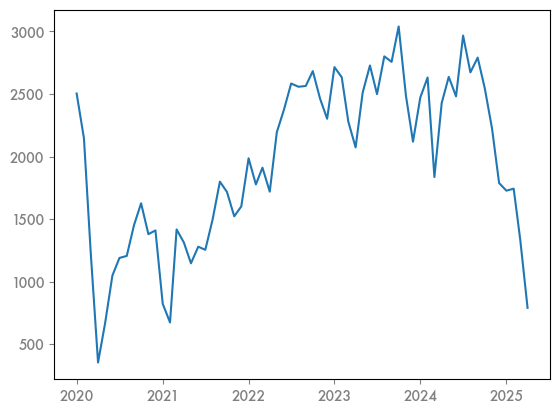

In [11]:
# change the font 
plt.plot(site_data['month'], site_data['month_filings'])

# you can change the font
plt.rcParams['font.family'] = 'Futura'

# the size
plt.rcParams['font.size'] = 10

# the weight (i.e. bold, italic)
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'

# the color
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'gray'   
plt.rcParams['xtick.color'] = 'gray'      
plt.rcParams['ytick.color'] = 'gray'      


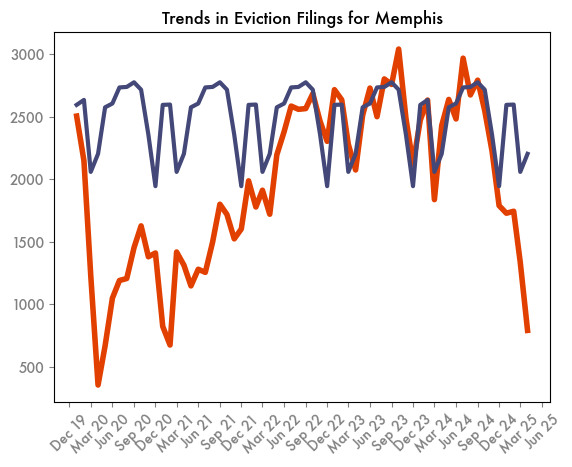

In [12]:
# Now, here are all those elements combined into one plot

# this adds the title
# change the title so it identifies your site, or to whatever you want it to be!
plt.title('Trends in Eviction Filings for Memphis')

# Add another additional line that measures the monthly average filings over time
plt.plot(site_data['month'], site_data['month_filings'], color = '#e24000', linewidth = 4)
plt.plot(site_data['month'], site_data['avg_filings'], color = '#434878', linewidth = 3)

# Rotate x-axis labels and change labels
# this rotates the x-axis labels
plt.xticks(rotation=45)

# this changes the labels so instead of being every year, it will list every 3 months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# this changes it so instead of the format `2024-01`, it'll say `Jan 24`
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

# you can change the font
plt.rcParams['font.family'] = 'Futura'

# the size
plt.rcParams['font.size'] = 10

# the weight (i.e. bold, italic)
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'

# the color
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'gray'   
plt.rcParams['xtick.color'] = 'gray'      
plt.rcParams['ytick.color'] = 'gray'      

# hint: if you want to see the other settings you can change, run this: `plt.rcParams.keys()``


In [ ]:
# You also may not want to show the whole period the data covers
# For instance, you might just be interested in looking at data from the last year
# This would require you to filter the data and then run the same plot

# you can replace 2024 for any year or date
subset = site_data[site_data['month'].dt.year >= 2024]

# just replace `site_data` with `subset`

plt.title('Trends in Eviction Filings for Memphis - January 2024 - Present')
plt.plot(subset['month'], subset['month_filings'], color = '#e24000', linewidth = 4)
plt.plot(subset['month'], subset['avg_filings'], color = '#434878', linewidth = 3)

plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.rcParams['font.family'] = 'Futura'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'gray'   
plt.rcParams['xtick.color'] = 'gray'      
plt.rcParams['ytick.color'] = 'gray'      

# To export your plot, run the following
# you'll have to change the file path
plt.savefig("/Users/gh3504/Downloads/my_plot.png") 